In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [2]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1833899c54d0c5474f6880c2e2426f6b


In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | biak
Processing Record 6 of Set 1 | astoria
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | ballina
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | makakilo city
Processing Record 11 of Set 1 | marcona
City not found. Skipping...
Processing Record 12 of Set 1 | havre-saint-pierre
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | te anau
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | kayasula
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Se

Processing Record 40 of Set 4 | tamiahua
Processing Record 41 of Set 4 | rafai
Processing Record 42 of Set 4 | campoverde
Processing Record 43 of Set 4 | virginia beach
Processing Record 44 of Set 4 | eagle pass
Processing Record 45 of Set 4 | marrakesh
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | sioux lookout
Processing Record 48 of Set 4 | challans
Processing Record 49 of Set 4 | stranda
Processing Record 50 of Set 4 | chingola
Processing Record 1 of Set 5 | havelock
Processing Record 2 of Set 5 | chimbarongo
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | nicoya
Processing Record 7 of Set 5 | onguday
Processing Record 8 of Set 5 | raudeberg
Processing Record 9 of Set 5 | lisakovsk
Processing Record 10 of Set 5 | sorong
Processing Record 11 of Set 5 | hilo
Processing Record 12 of Set 5 | mocambique
City not found. Skipping...


Processing Record 29 of Set 8 | provideniya
Processing Record 30 of Set 8 | taburi
City not found. Skipping...
Processing Record 31 of Set 8 | bambanglipuro
Processing Record 32 of Set 8 | beitbridge
Processing Record 33 of Set 8 | mathbaria
Processing Record 34 of Set 8 | yerofey pavlovich
Processing Record 35 of Set 8 | dwarka
Processing Record 36 of Set 8 | abapo
Processing Record 37 of Set 8 | kontagora
Processing Record 38 of Set 8 | saint-georges
Processing Record 39 of Set 8 | mezen
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | bucerias
Processing Record 42 of Set 8 | kutum
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | aswan
Processing Record 45 of Set 8 | honningsvag
Processing Record 46 of Set 8 | jumla
Processing Record 47 of Set 8 | keti bandar
Processing Record 48 of Set 8 | inirida
Processing Record 49 of Set 8 | suoyarvi
Processing Record 50 of Set 8 | freeport
Processing Record 1 of Set 9 | sharlyk
Processing Record 2 

Processing Record 17 of Set 12 | abilene
Processing Record 18 of Set 12 | omsukchan
Processing Record 19 of Set 12 | hirara
Processing Record 20 of Set 12 | kamaishi
Processing Record 21 of Set 12 | yermakovskoye
Processing Record 22 of Set 12 | simao
Processing Record 23 of Set 12 | progreso
Processing Record 24 of Set 12 | pampa
Processing Record 25 of Set 12 | ak-dovurak
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | shimoda
Processing Record 28 of Set 12 | santa maria
Processing Record 29 of Set 12 | san rafael
Processing Record 30 of Set 12 | strezhevoy
Processing Record 31 of Set 12 | mentok
City not found. Skipping...
Processing Record 32 of Set 12 | vao
Processing Record 33 of Set 12 | xai-xai
Processing Record 34 of Set 12 | seymour
Processing Record 35 of Set 12 | ibra
Processing Record 36 of Set 12 | chitrakonda
Processing Record 37 of Set 12 | thunder bay
Processing Record 38 of Set 12 | tres arroyos
Processing Record 39 of Set 12 | asyut
Process

In [9]:
len(city_data)

576

In [5]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acapulco,MX,2022-09-12 22:24:37,16.8634,-99.8901,85.82,66,75,8.05
1,East London,ZA,2022-09-12 22:29:13,-33.0153,27.9116,57.29,63,15,10.69
2,Kapaa,US,2022-09-12 22:29:14,22.0752,-159.3190,85.19,69,0,11.50
3,Biak,ID,2022-09-12 22:29:14,-0.9131,122.8766,74.55,87,20,5.75
4,Astoria,US,2022-09-12 22:29:14,46.1879,-123.8313,69.69,71,100,6.91
...,...,...,...,...,...,...,...,...,...
571,Arlit,NE,2022-09-12 22:43:47,18.7369,7.3853,93.15,10,0,9.62
572,Leopold,AU,2022-09-12 22:43:47,-38.1833,144.4667,48.22,92,40,6.91
573,Birobidzhan,RU,2022-09-12 22:43:48,48.8000,132.9500,55.06,83,6,7.90
574,Half Moon Bay,US,2022-09-12 22:39:12,37.4636,-122.4286,83.88,70,75,23.02


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [6]:
# Files to load
city_data_to_load = "weather_data/cities.csv"

In [7]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Acapulco,MX,2022-09-12 22:24:37,16.8634,-99.8901,85.82,66,75,8.05
1,1,East London,ZA,2022-09-12 22:29:13,-33.0153,27.9116,57.29,63,15,10.69
2,2,Kapaa,US,2022-09-12 22:29:14,22.0752,-159.3190,85.19,69,0,11.50
3,3,Biak,ID,2022-09-12 22:29:14,-0.9131,122.8766,74.55,87,20,5.75
4,4,Astoria,US,2022-09-12 22:29:14,46.1879,-123.8313,69.69,71,100,6.91
...,...,...,...,...,...,...,...,...,...,...
571,571,Arlit,NE,2022-09-12 22:43:47,18.7369,7.3853,93.15,10,0,9.62
572,572,Leopold,AU,2022-09-12 22:43:47,-38.1833,144.4667,48.22,92,40,6.91
573,573,Birobidzhan,RU,2022-09-12 22:43:48,48.8000,132.9500,55.06,83,6,7.90
574,574,Half Moon Bay,US,2022-09-12 22:39:12,37.4636,-122.4286,83.88,70,75,23.02


In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

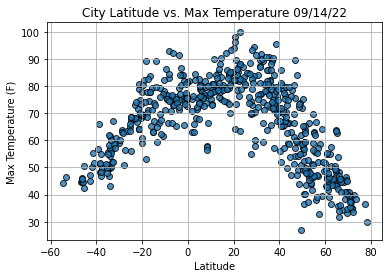

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

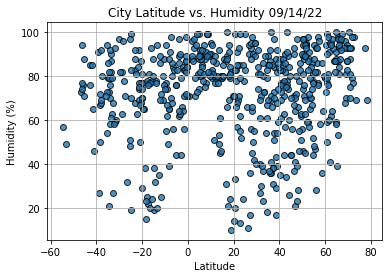

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

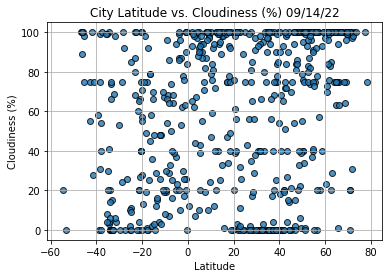

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

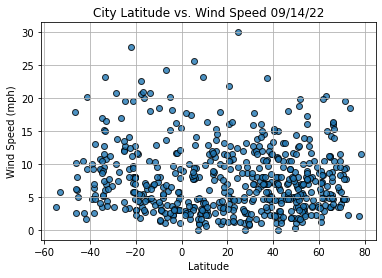

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Acapulco,MX,2022-09-12 22:24:37,16.8634,-99.8901,85.82,66,75,8.05
2,2,Kapaa,US,2022-09-12 22:29:14,22.0752,-159.3190,85.19,69,0,11.50
4,4,Astoria,US,2022-09-12 22:29:14,46.1879,-123.8313,69.69,71,100,6.91
6,6,Nikolskoye,RU,2022-09-12 22:29:15,59.7035,30.7861,51.69,79,97,3.71
7,7,Makakilo City,US,2022-09-12 22:29:15,21.3469,-158.0858,86.32,57,100,12.66


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

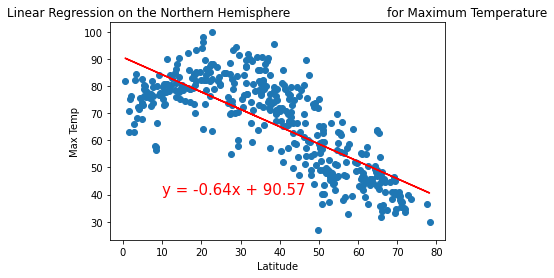

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

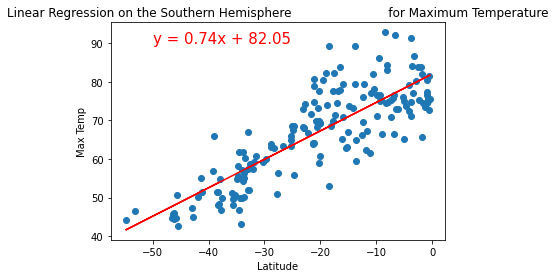

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

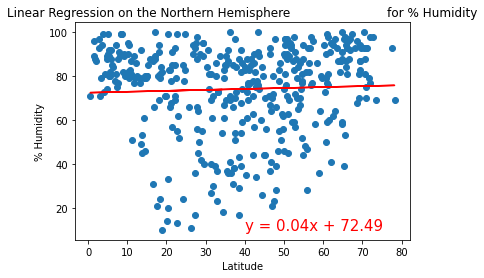

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

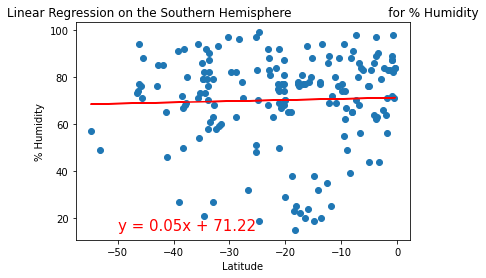

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

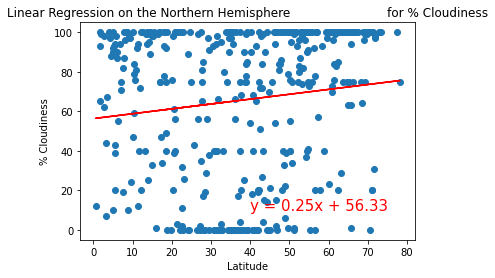

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

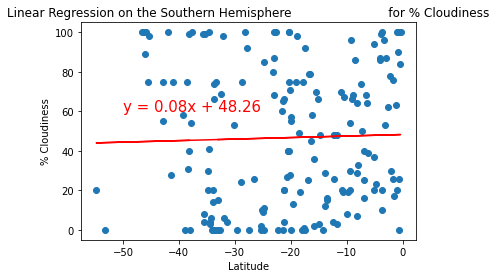

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

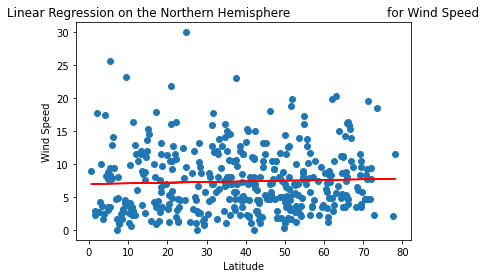

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

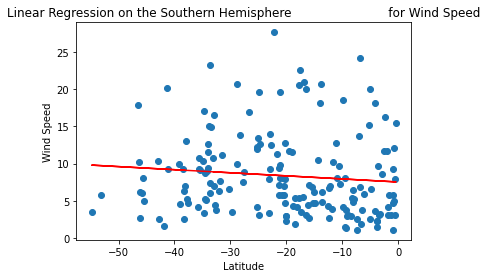

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))